#INF1340 Final Project Yanke Mo 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
df = pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx')

In [2]:
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<ipython-input-2-a5a2fb7197c7>:3: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


In [3]:
table_01 = pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 1')
table_02= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 2')
table_03= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 3')
table_04= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 4')
table_05= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 5')
table_06= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 6')
table_annex= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='ANNEX')
table_notes= pd.read_excel('/content/UN_MigrantStockTotal_2015.xlsx', sheet_name='NOTES')

The aim of this project is to study the performance of international migration. The project is interested in finding out whether the choice of migration will be impacted by regions or gender. The dataset that will be analyzed is the “United Nation: Trends in International Migrant Stock”, it captures the migrant stock for all regions based on gender from year 1990 to year 2015.
In the following content, the project will mainly focus on applying data visualization. By using descriptive statistics and small multiple figures, the project will analyze the change in migration in terms of regions and genders. In addition, the written project will cover tables that are significant and meaningful to the migration. These tables are table 1, table 3, table 4, and table 5 in the UN dataset; the rest of the tables will not be considered in this analysis.

#Table One#

In [4]:
#Drop 0-15 rows
table_1_1 = table_01.drop(table_01.index[0:15])
#Rename the columns
table_1_1.columns=['Order','Name of Country','Notes','Country Code','Type of Data(a)','1990 Migrant Stock Both Sex',
                  '1995 Migrant Stock Both Sex','2000 Migrant Stock Both Sex','2005 Migrant Stock Both Sex',
                  '2010 Migrant Stock Both Sex','2015 Migrant Stock Both Sex','1990 Migrant Stock Male',
                  '1995 Migrant Stock Male','2000 Migrant Stock Male','2005 Migrant Stock Male','2010 Migrant Stock Male',
                  '2015 Migrant Stock Male','1990 Migrant Stock Female','1995 Migrant Stock Female','2000 Migrant Stock Female',
                  '2005 Migrant Stock Female','2010 Migrant Stock Female',
                  '2015 Migrant Stock Female']


In [5]:
#Melt Columns
tidy_table_01 = table_1_1.melt(id_vars=["Order","Name of Country","Notes","Country Code","Type of Data(a)"],var_name="Year",value_name="Migrant Stock")

In [ ]:
#Separate the Year cloumns into year, gemder, migrant stock
tidy_table_01=(tidy_table_01.assign(year = lambda x: x.Year.str[:4].astype(str), Gender = lambda x: x.Year.str[18:].astype(str)).drop("Year",axis=1))
tidy_table_01.sort_values(by ='Order').reset_index().drop(columns = 'index') 

In [ ]:
#Remove Missing Value
missing_val = [".."]
missing = tidy_table_01.isin(missing_val)
table1_RM = tidy_table_01.mask(missing, np.nan)
#Remove Non-Country Variable
index_def = table1_RM[(table1_RM['Name of Country']=='WORLD')|(table1_RM['Name of Country']=='Developed regions')|(table1_RM['Name of Country']=='Developing regions')|
                                (table1_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table1_RM['Name of Country']=='Africa')|
                                (table1_RM['Name of Country']=='Eastern Africa')|
                                (table1_RM['Name of Country']=='Middle Africa')|
                                (table1_RM['Name of Country']=='Northern Africa')|
                                (table1_RM['Name of Country']=='Southern Africa')|
                                (table1_RM['Name of Country']=='Western Africa')|
                                (table1_RM['Name of Country']=='Asia')|
                                (table1_RM['Name of Country']=='Central Asia')|
                                (table1_RM['Name of Country']=='Eastern Asia')|
                                (table1_RM['Name of Country']=='South-Eastern Asia')|
                                (table1_RM['Name of Country']=='Southern Asia')|
                                (table1_RM['Name of Country']=='Europe')|
                                (table1_RM['Name of Country']=='Eastern Europe')|
                                (table1_RM['Name of Country']=='Northern Europe')|
                                (table1_RM['Name of Country']=='Southern Europe')|
                                (table1_RM['Name of Country']=='Western Europe')|
                                (table1_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table1_RM['Name of Country']=='Central America')|
                                (table1_RM['Name of Country']=='South America')|
                                (table1_RM['Name of Country']=='Central America')|
                                (table1_RM['Name of Country']=='Northern America')|
                                (table1_RM['Name of Country']=='Oceania')|
                                (table1_RM['Name of Country']=='Australia and New Zealand')|
                                (table1_RM['Name of Country']=='Melanesia')|
                                (table1_RM['Name of Country']=='Micronesia')|
                                (table1_RM['Name of Country']=='Polynesia')|
                                (table1_RM['Name of Country']=='Least developed countries')|
                                (table1_RM['Name of Country']=='Less developed regions excluding least developed countries')].index
table1_RMC = table1_RM.drop(index_def) 
table1_RMC

In [ ]:
#Convert year and migrant stock into numeric
table1_RMC['year'] = pd.to_numeric(table1_RMC['year'], errors = 'raise')
table1_RMC['year'].head()
table1_RMC['Migrant Stock'] = pd.to_numeric(table1_RMC['Migrant Stock'], errors = 'raise')
table1_RMC['Migrant Stock'].head()


Text(0.5, 0.98, 'International Migrant Stock for All Gender From 1995 to 2015(Table 1.1)')

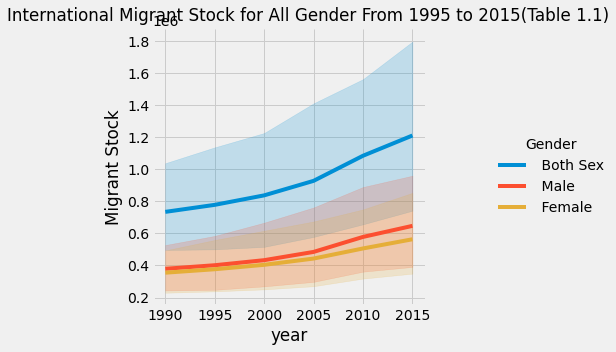

In [9]:
#Figure 1
#Shows gender development throught out 1990-2015 by country 
fig1 = table1_RMC.to_dict()
fig11 = sns.relplot(data=fig1, x="year", y="Migrant Stock", hue="Gender", kind="line")
fig11.figure.suptitle("International Migrant Stock for All Gender From 1995 to 2015(Table 1.1)")

In [ ]:
#Selected Region and Continue to form a new dataframe
table1_Region_Conti = table1_RM.loc[(table1_RM['Name of Country']=='WORLD')|(table1_RM['Name of Country']=='Developed regions')|(table1_RM['Name of Country']=='Developing regions')|
                                (table1_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table1_RM['Name of Country']=='Africa')|
                                (table1_RM['Name of Country']=='Eastern Africa')|
                                (table1_RM['Name of Country']=='Middle Africa')|
                                (table1_RM['Name of Country']=='Northern Africa')|
                                (table1_RM['Name of Country']=='Southern Africa')|
                                (table1_RM['Name of Country']=='Western Africa')|
                                (table1_RM['Name of Country']=='Asia')|
                                (table1_RM['Name of Country']=='Central Asia')|
                                (table1_RM['Name of Country']=='Eastern Asia')|
                                (table1_RM['Name of Country']=='South-Eastern Asia')|
                                (table1_RM['Name of Country']=='Southern Asia')|
                                (table1_RM['Name of Country']=='Europe')|
                                (table1_RM['Name of Country']=='Eastern Europe')|
                                (table1_RM['Name of Country']=='Northern Europe')|
                                (table1_RM['Name of Country']=='Southern Europe')|
                                (table1_RM['Name of Country']=='Western Europe')|
                                (table1_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table1_RM['Name of Country']=='Central America')|
                                (table1_RM['Name of Country']=='South America')|
                                (table1_RM['Name of Country']=='Central America')|
                                (table1_RM['Name of Country']=='Northern America')|
                                (table1_RM['Name of Country']=='Oceania')|
                                (table1_RM['Name of Country']=='Australia and New Zealand')|
                                (table1_RM['Name of Country']=='Melanesia')|
                                (table1_RM['Name of Country']=='Micronesia')|
                                (table1_RM['Name of Country']=='Polynesia')|
                                (table1_RM['Name of Country']=='Least developed countries')|
                                (table1_RM['Name of Country']=='Less developed regions excluding least developed countries')]
table1_Region_Conti

In [ ]:
#Convert year and migrant stock into numeric
table1_Region_Conti['year'] = pd.to_numeric(table1_Region_Conti['year'], errors = 'raise')
table1_Region_Conti['Migrant Stock'] = pd.to_numeric(table1_Region_Conti['Migrant Stock'], errors = 'raise')

Text(0.5, 0.98, 'International Migrant Stock of Region or Continents from 1995 to 2015(Table 1.2)')

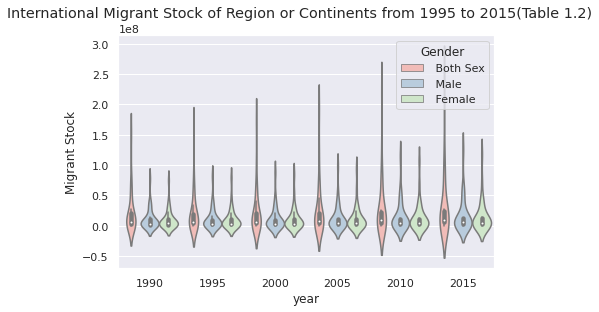

In [24]:
#Figure 2: Violin graph
sns.set(style="darkgrid")
fig1_2 = sns.violinplot(x="year", y="Migrant Stock", hue="Gender", data=table1_Region_Conti, palette="Pastel1", width=0.9)
fig1_2.figure.suptitle("International Migrant Stock of Region or Continents from 1995 to 2015(Table 1.2)")

The small multiple figure below used plotly, it need to be open at Jupyter. 

In [13]:
#Figure 3 shows the trend of migrant stock in both gender and year based on continents
fig1_3 = px.histogram(data_frame = table1_Region_Conti, x = 'Name of Country', y = 'Migrant Stock', facet_col = 'year', facet_row= 'Gender')
#fig1_3.suptitle("International Migrant Stock of Region or Continents from 1995 to 2015(Table 1.3)")
fig1_3

In [ ]:
#Looking at the performance of Easterm Europe particularly
table1_EU = table1_RM.loc[(table1_RM['Name of Country']=='Belarus')|(table1_RM['Name of Country']=='Belarus')|(table1_RM['Name of Country']=='Czech Republic')|
                                (table1_RM['Name of Country']=='Hungary')|
                                (table1_RM['Name of Country']=='Poland')|
                                (table1_RM['Name of Country']=='Republic of Moldova')|
                                (table1_RM['Name of Country']=='Romania')|
                                (table1_RM['Name of Country']=='Russian Federation')|
                                (table1_RM['Name of Country']=='Slovakia')|
                                (table1_RM['Name of Country']=='Ukraine')]
table1_EU

Text(0.5, 0.98, 'International Migrant Stock for Eastern Europe(Table 1.4)')

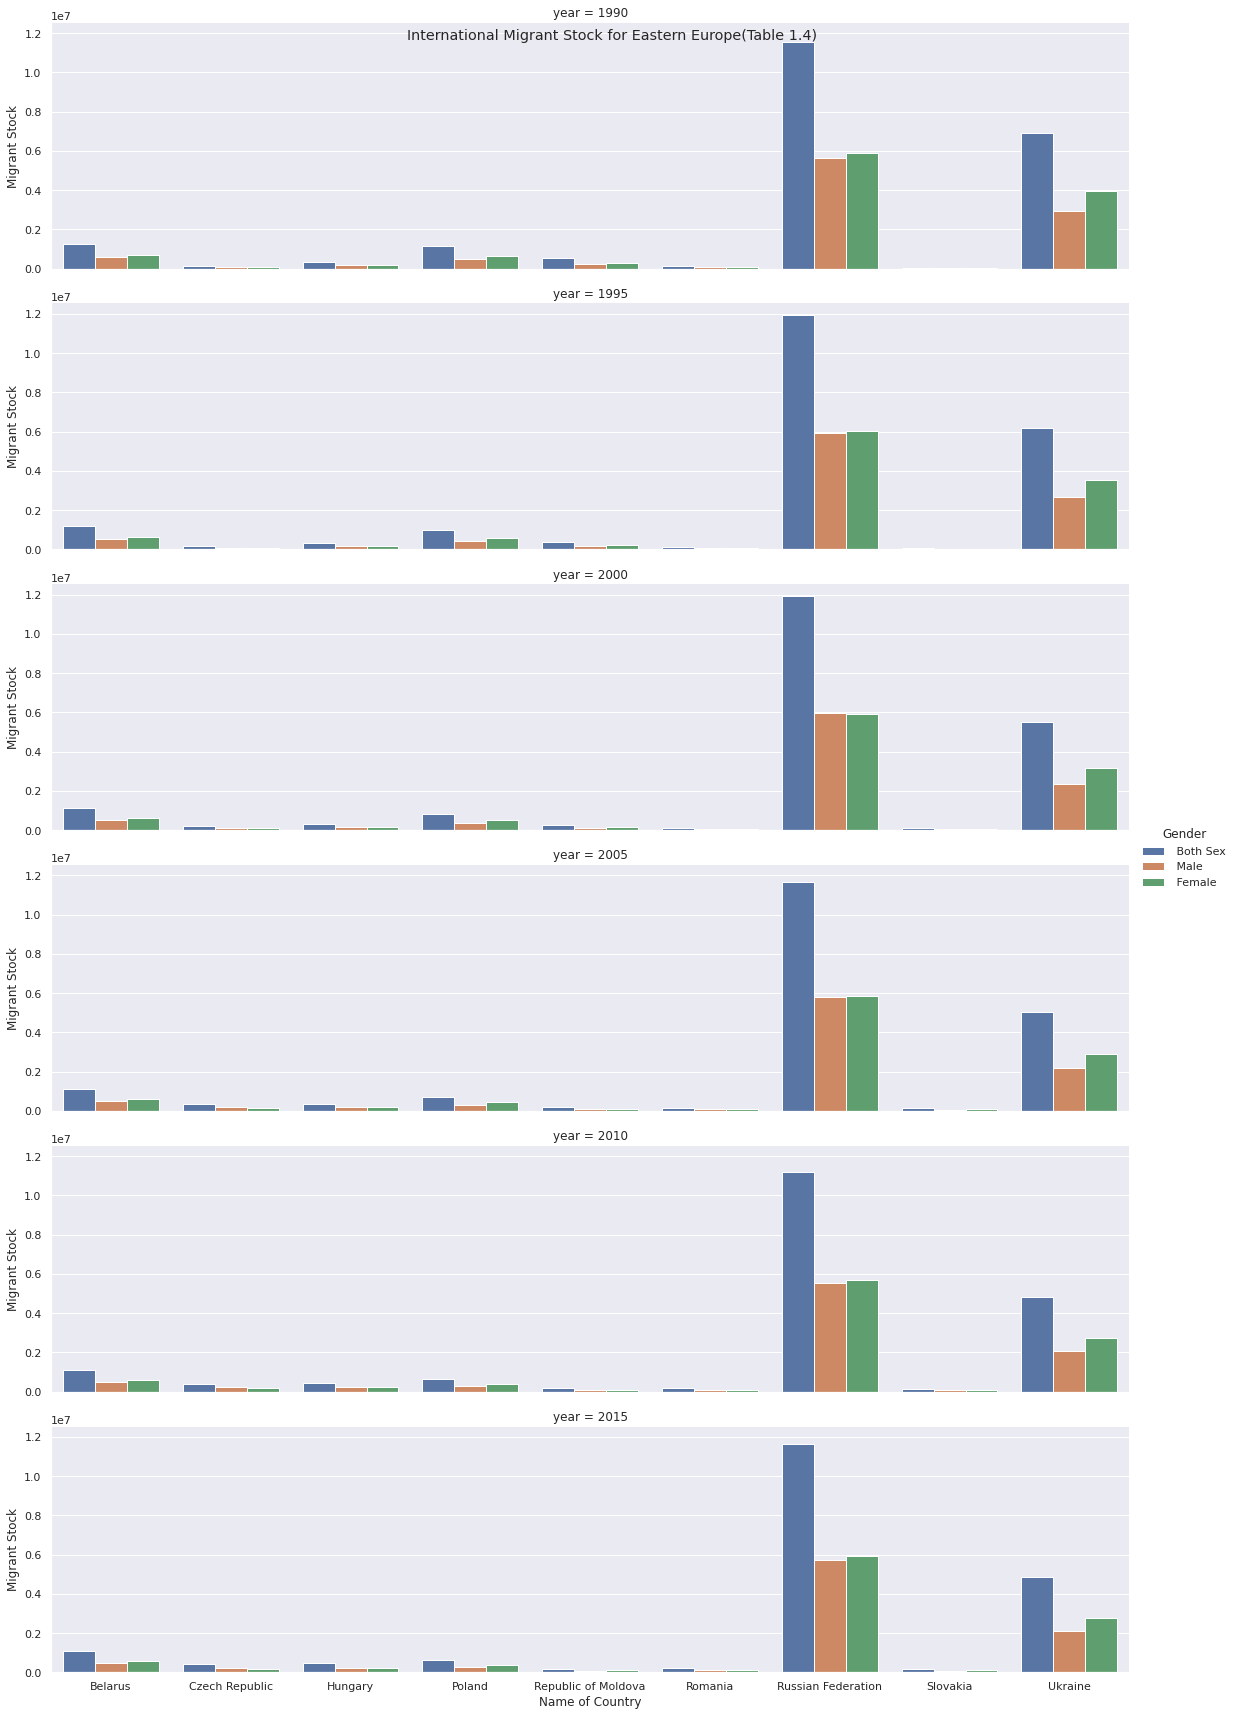

In [15]:
#Figure 4: Eastern Europe 
fig1_4 = sns.catplot(x="Name of Country", y="Migrant Stock", hue="Gender", row = "year", data=table1_EU, kind="bar", height=4, aspect=4)
fig1_4.figure.suptitle("International Migrant Stock for Eastern Europe(Table 1.4)")

#Table_3#

In [ ]:
table_3_1 = table_03.drop(table_03.index[0:15])
#Rename Columns
table_3_1.columns=['Order','Name of Country','Notes','Country Code','Type of Data(a)','1990 Migrant Stock Percentage for Both Sex',
                  '1995 Migrant Stock Percentage for Both Sex','2000 Migrant Stock Percentage for Both Sex','2005 Migrant Stock Percentage for Both Sex',
                  '2010 Migrant Stock Percentage for Both Sex','2015 Migrant Stock Percentage for Both Sex','1990 Migrant Stock Percentage for Male',
                  '1995 Migrant Stock Percentage for Male','2000 Migrant Stock Percentage for Male','2005 Migrant Stock Percentage for Male','2010 Migrant Stock Percentage for Male',
                  '2015 Migrant Stock Percentage for Male','1990 Migrant Stock Percentage for Female','1995 Migrant Stock Percentage for Female','2000 Migrant Stock Percentage for Female',
                  '2005 Migrant Stock Percentage for Female','2010 Migrant Stock Percentage for Female',
                  '2015 Migrant Stock Percentage for Female']
#Melt
tidy_table_03 = table_3_1.melt(id_vars=["Order","Name of Country","Notes","Country Code","Type of Data(a)"],var_name="Years",value_name="International Migrant Stock as Percentage of Total Population")
#Plit the Strings
tidy_table_03=(tidy_table_03.assign(year = lambda x: x.Years.str[:4].astype(str), Gender = lambda x: x.Years.str[33:].astype(str)).drop("Years",axis=1))
tidy_table_03.sort_values(by ='Order').reset_index().drop(columns = 'index')

In [ ]:
#Remove Missing Value
missing_val = [".."]
missing = tidy_table_03.isin(missing_val)
table3_RM = tidy_table_03.mask(missing, np.nan)
#Remove Non-Country Variable
index_def = table3_RM[(table3_RM['Name of Country']=='WORLD')|(table3_RM['Name of Country']=='Developed regions')|(table3_RM['Name of Country']=='Developing regions')|
                                (table3_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table3_RM['Name of Country']=='Africa')|
                                (table3_RM['Name of Country']=='Eastern Africa')|
                                (table3_RM['Name of Country']=='Middle Africa')|
                                (table3_RM['Name of Country']=='Northern Africa')|
                                (table3_RM['Name of Country']=='Southern Africa')|
                                (table3_RM['Name of Country']=='Western Africa')|
                                (table3_RM['Name of Country']=='Asia')|
                                (table3_RM['Name of Country']=='Central Asia')|
                                (table3_RM['Name of Country']=='Eastern Asia')|
                                (table3_RM['Name of Country']=='South-Eastern Asia')|
                                (table3_RM['Name of Country']=='Southern Asia')|
                                (table3_RM['Name of Country']=='Europe')|
                                (table3_RM['Name of Country']=='Eastern Europe')|
                                (table3_RM['Name of Country']=='Northern Europe')|
                                (table3_RM['Name of Country']=='Southern Europe')|
                                (table3_RM['Name of Country']=='Western Europe')|
                                (table3_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table3_RM['Name of Country']=='Central America')|
                                (table3_RM['Name of Country']=='South America')|
                                (table3_RM['Name of Country']=='Central America')|
                                (table3_RM['Name of Country']=='Northern America')|
                                (table3_RM['Name of Country']=='Oceania')|
                                (table3_RM['Name of Country']=='Australia and New Zealand')|
                                (table3_RM['Name of Country']=='Melanesia')|
                                (table3_RM['Name of Country']=='Micronesia')|
                                (table3_RM['Name of Country']=='Polynesia')|
                                (table3_RM['Name of Country']=='Least developed countries')|
                                (table3_RM['Name of Country']=='Less developed regions excluding least developed countries')].index
table3_RMC = table3_RM.drop(index_def) 
table3_RMC

In [ ]:
#Convert year and migrant stock into numeric
table3_RMC['year'] = pd.to_numeric(table3_RMC['year'], errors = 'raise')
table3_RMC['year'].head()
table3_RMC['International Migrant Stock as Percentage of Total Population	'] = pd.to_numeric(table3_RMC['International Migrant Stock as Percentage of Total Population'], errors = 'raise')
table3_RMC['International Migrant Stock as Percentage of Total Population	'].head()

Text(0.5, 0.98, 'International Migrant Stock as Percentage of Total Population for All Gender From 1995 to 2015(Table 3.1)')

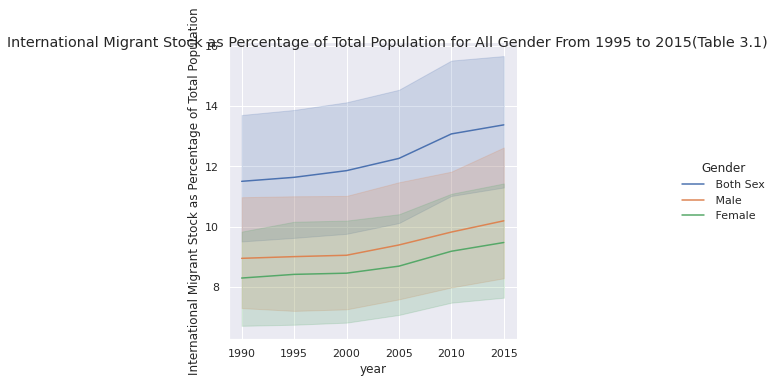

In [56]:
#Figure 1
#Shows gender development throught out 1990-2015 by country 
fig3 = table3_RMC.to_dict()
fig31 = sns.relplot(data=fig3, x="year", y="International Migrant Stock as Percentage of Total Population", hue="Gender", kind="line")
fig31.figure.suptitle("International Migrant Stock as Percentage of Total Population for All Gender From 1995 to 2015(Table 3.1)")

In [ ]:
#Selected Region and Continue to form a new dataframe
table3_Region_Conti = table3_RM.loc[(table3_RM['Name of Country']=='WORLD')|(table3_RM['Name of Country']=='Developed regions')|(table3_RM['Name of Country']=='Developing regions')|
                                (table3_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table3_RM['Name of Country']=='Africa')|
                                (table3_RM['Name of Country']=='Eastern Africa')|
                                (table3_RM['Name of Country']=='Middle Africa')|
                                (table3_RM['Name of Country']=='Northern Africa')|
                                (table3_RM['Name of Country']=='Southern Africa')|
                                (table3_RM['Name of Country']=='Western Africa')|
                                (table3_RM['Name of Country']=='Asia')|
                                (table3_RM['Name of Country']=='Central Asia')|
                                (table3_RM['Name of Country']=='Eastern Asia')|
                                (table3_RM['Name of Country']=='South-Eastern Asia')|
                                (table3_RM['Name of Country']=='Southern Asia')|
                                (table3_RM['Name of Country']=='Europe')|
                                (table3_RM['Name of Country']=='Eastern Europe')|
                                (table3_RM['Name of Country']=='Northern Europe')|
                                (table3_RM['Name of Country']=='Southern Europe')|
                                (table3_RM['Name of Country']=='Western Europe')|
                                (table3_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table3_RM['Name of Country']=='Central America')|
                                (table3_RM['Name of Country']=='South America')|
                                (table3_RM['Name of Country']=='Central America')|
                                (table3_RM['Name of Country']=='Northern America')|
                                (table3_RM['Name of Country']=='Oceania')|
                                (table3_RM['Name of Country']=='Australia and New Zealand')|
                                (table3_RM['Name of Country']=='Melanesia')|
                                (table3_RM['Name of Country']=='Micronesia')|
                                (table3_RM['Name of Country']=='Polynesia')|
                                (table3_RM['Name of Country']=='Least developed countries')|
                                (table3_RM['Name of Country']=='Less developed regions excluding least developed countries')]
table3_Region_Conti

In [ ]:
#Convert year and migrant stock into numeric
table3_Region_Conti['year'] = pd.to_numeric(table3_Region_Conti['year'], errors = 'raise')
table3_Region_Conti['International Migrant Stock as Percentage of Total Population'] = pd.to_numeric(table3_Region_Conti['International Migrant Stock as Percentage of Total Population'], errors = 'raise')

Text(0.5, 0.98, 'International Migrant Stock as Percentage of Total Population from 1995 to 2015(Table 3.2)')

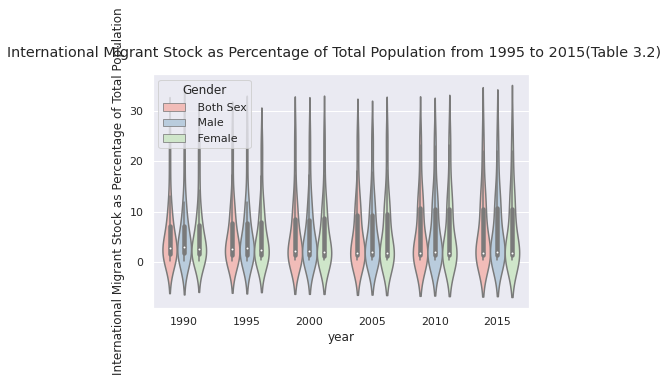

In [31]:
sns.set(style="darkgrid")
# Grouped violinplot
fig3_2 = sns.violinplot(x="year", y="International Migrant Stock as Percentage of Total Population", hue="Gender", data=table3_Region_Conti, palette="Pastel1", width=0.7)
fig3_2.figure.suptitle("International Migrant Stock as Percentage of Total Population from 1995 to 2015(Table 3.2)")

The small multiple figure below used plotly, it need to be open at Jupyter. 

In [33]:
#Figure 3 shows the trend of migrant stock in both gender and year based on continents
fig3_3 = px.histogram(data_frame = table3_Region_Conti, x = 'Name of Country', y = 'International Migrant Stock as Percentage of Total Population', facet_col = 'year', facet_row= 'Gender')
#fig3_3.figure.suptitle("International Migrant Stock of Region or Continents from 1995 to 2015(Table 3.3)")
fig3_3

#Table_4#

In [ ]:
table_4_1 = table_04.drop(table_04.index[0:15])
#Rename the Columns
table_4_1.columns=['Order','Name of Country','Notes','Country Code','Type of Data(a)',
                   '1990 Female Migrants Stock Percentage Performance',
                   '1995 Female Migrants Stock Percentage Performance',
                   '2000 Female Migrants Stock Percentage Performance',
                   '2005 Female Migrants Stock Percentage Performance',
                   '2010 Female Migrants Stock Percentage Performance',
                   '2015 Female Migrants Stock Percentage Performance']
#Melt
tidy_table_04 = table_4_1.melt(id_vars=["Order","Name of Country","Notes","Country Code","Type of Data(a)"],var_name="Years",value_name="Female Migrants Stock Percentage Performance")
#Split the Strings
tidy_table_04=(tidy_table_04.assign(Year = lambda x: x.Years.str[:4].astype(str), Gender = lambda x: x.Years.str[5:11].astype(str)).drop("Years",axis=1))
tidy_table_04.sort_values(by ='Order').reset_index().drop(columns = 'index')

In [ ]:
#Remove Missing Value
missing_val = [".."]
missing = tidy_table_04.isin(missing_val)
table4_RM = tidy_table_04.mask(missing, np.nan)
#Remove Non-Country Variable
index_def = table4_RM[(table4_RM['Name of Country']=='WORLD')|(table4_RM['Name of Country']=='Developed regions')|(table4_RM['Name of Country']=='Developing regions')|
                                (table4_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table4_RM['Name of Country']=='Africa')|
                                (table4_RM['Name of Country']=='Eastern Africa')|
                                (table4_RM['Name of Country']=='Middle Africa')|
                                (table4_RM['Name of Country']=='Northern Africa')|
                                (table4_RM['Name of Country']=='Southern Africa')|
                                (table4_RM['Name of Country']=='Western Africa')|
                                (table4_RM['Name of Country']=='Asia')|
                                (table4_RM['Name of Country']=='Central Asia')|
                                (table4_RM['Name of Country']=='Eastern Asia')|
                                (table4_RM['Name of Country']=='South-Eastern Asia')|
                                (table4_RM['Name of Country']=='Southern Asia')|
                                (table4_RM['Name of Country']=='Europe')|
                                (table4_RM['Name of Country']=='Eastern Europe')|
                                (table4_RM['Name of Country']=='Northern Europe')|
                                (table4_RM['Name of Country']=='Southern Europe')|
                                (table4_RM['Name of Country']=='Western Europe')|
                                (table4_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table4_RM['Name of Country']=='Central America')|
                                (table4_RM['Name of Country']=='South America')|
                                (table4_RM['Name of Country']=='Central America')|
                                (table4_RM['Name of Country']=='Northern America')|
                                (table4_RM['Name of Country']=='Oceania')|
                                (table4_RM['Name of Country']=='Australia and New Zealand')|
                                (table4_RM['Name of Country']=='Melanesia')|
                                (table4_RM['Name of Country']=='Micronesia')|
                                (table4_RM['Name of Country']=='Polynesia')|
                                (table4_RM['Name of Country']=='Least developed countries')|
                                (table4_RM['Name of Country']=='Less developed regions excluding least developed countries')].index
table4_RMC = table4_RM.drop(index_def) 
table4_RMC

In [ ]:
#Convert year and migrant stock into numeric
table4_RMC['Year'] = pd.to_numeric(table4_RMC['Year'], errors = 'raise')
table4_RMC['Year'].head()
table4_RMC['Female Migrants Stock Percentage Performance'] = pd.to_numeric(table4_RMC['Female Migrants Stock Percentage Performance'], errors = 'raise')
table4_RMC['Female Migrants Stock Percentage Performance'].head()

Text(0.5, 0.98, 'Female Migrants Stock as Percentage Performance From 1995 to 2015(Table 4.1)')

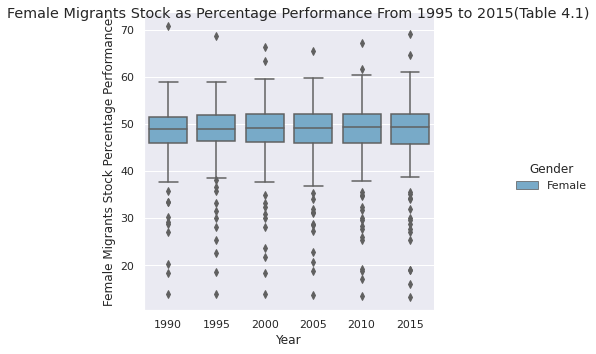

In [38]:
#Visualization of table_1_Bothsexes
#Box Plot
sns.set(style="darkgrid")
fig41 = sns.catplot(data=table4_RMC, kind="box", x="Year", y="Female Migrants Stock Percentage Performance", hue="Gender", palette="Blues")
fig41.figure.suptitle("Female Migrants Stock as Percentage Performance From 1995 to 2015(Table 4.1)")

Text(0.5, 0.98, 'Female Migrants Stock as Percentage Performance From 1995 to 2015(Table 4.1)')

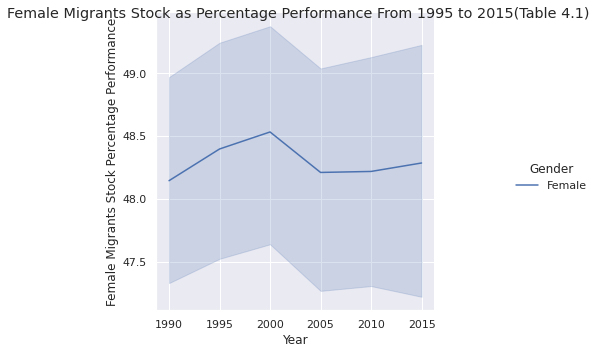

In [39]:
#Figure 1
#Shows gender development throught out 1990-2015 by country 
fig4 = table4_RMC.to_dict()
fig42 = sns.relplot(data=fig4, x="Year", y="Female Migrants Stock Percentage Performance", hue="Gender", kind="line")
fig42.figure.suptitle("Female Migrants Stock as Percentage Performance From 1995 to 2015(Table 4.1)")

In [ ]:
#Selected Region and Continue to form a new dataframe
table4_Region_Conti = table4_RM.loc[(table4_RM['Name of Country']=='WORLD')|(table4_RM['Name of Country']=='Developed regions')|(table4_RM['Name of Country']=='Developing regions')|
                                (table4_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table4_RM['Name of Country']=='Africa')|
                                (table4_RM['Name of Country']=='Eastern Africa')|
                                (table4_RM['Name of Country']=='Middle Africa')|
                                (table4_RM['Name of Country']=='Northern Africa')|
                                (table4_RM['Name of Country']=='Southern Africa')|
                                (table4_RM['Name of Country']=='Western Africa')|
                                (table4_RM['Name of Country']=='Asia')|
                                (table4_RM['Name of Country']=='Central Asia')|
                                (table4_RM['Name of Country']=='Eastern Asia')|
                                (table4_RM['Name of Country']=='South-Eastern Asia')|
                                (table4_RM['Name of Country']=='Southern Asia')|
                                (table4_RM['Name of Country']=='Europe')|
                                (table4_RM['Name of Country']=='Eastern Europe')|
                                (table4_RM['Name of Country']=='Northern Europe')|
                                (table4_RM['Name of Country']=='Southern Europe')|
                                (table4_RM['Name of Country']=='Western Europe')|
                                (table4_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table4_RM['Name of Country']=='Central America')|
                                (table4_RM['Name of Country']=='South America')|
                                (table4_RM['Name of Country']=='Central America')|
                                (table4_RM['Name of Country']=='Northern America')|
                                (table4_RM['Name of Country']=='Oceania')|
                                (table4_RM['Name of Country']=='Australia and New Zealand')|
                                (table4_RM['Name of Country']=='Melanesia')|
                                (table4_RM['Name of Country']=='Micronesia')|
                                (table4_RM['Name of Country']=='Polynesia')|
                                (table4_RM['Name of Country']=='Least developed countries')|
                                (table4_RM['Name of Country']=='Less developed regions excluding least developed countries')]
table4_Region_Conti

In [ ]:
#Convert year and migrant stock into numeric
table4_Region_Conti['Year'] = pd.to_numeric(table4_Region_Conti['Year'], errors = 'raise')
table4_Region_Conti['Female Migrants Stock Percentage Performance'] = pd.to_numeric(table4_Region_Conti['Female Migrants Stock Percentage Performance'], errors = 'raise')

The small multiple figure below used plotly, it need to be open at Jupyter. 

In [42]:
#Figure 3 shows the trend of migrant stock in both gender and year based on continents
fig4_3 = px.histogram(data_frame = table4_Region_Conti, x = 'Name of Country', y = 'Female Migrants Stock Percentage Performance', facet_col = 'Year', facet_row = 'Gender')
#fig4_3.set_title("International Migrant Stock of Female from 1995 to 2015(Table 4.3)")
fig4_3

#Table_5#

In [ ]:
table_5_1 = table_05.drop(table_05.index[0:15])
#Rename the Columns
table_5_1.columns=['Order','Name of Country','Notes','Country Code','Type of Data(a)','1990-1995 Annual rate of change Both Sex',
                  '1995-2000 Annual rate of change Both Sex','2000-2005 Annual rate of change Both Sex',
                  '2005-2010 Annual rate of change Both Sex','2010-2015 Annual rate of change Both Sex',
                  '1990-1995 Annual rate of change Male','1995-2000 Annual rate of change Male',
                  '2000-2005 Annual rate of change Male','2005-2010 Annual rate of change Male',
                  '2010-2015 Annual rate of change Male','1990-1995 Annual rate of change Female',
                  '1995-2000 Annual rate of change Female','2000-2005 Annual rate of change Female',
                  '2005-2010 Annual rate of change Female','2010-2015 Annual rate of change Female']
#Melt
tidy_table_05 = table_5_1.melt(id_vars=["Order","Name of Country","Notes","Country Code","Type of Data(a)"],var_name="Years",value_name="Annual Rate of Change of Migrant Stock")
#Split Strings
tidy_table_05=(tidy_table_05.assign(Year_Range = lambda x: x.Years.str[:9].astype(str), Gender = lambda x: x.Years.str[31:].astype(str)).drop("Years",axis=1))
tidy_table_05.sort_values(by ='Order').reset_index().drop(columns = 'index')

In [ ]:
#Remove Missing Value
missing_val = [".."]
missing = tidy_table_05.isin(missing_val)
table5_RM = tidy_table_05.mask(missing, np.nan)
#Remove Non-Country Variable
index_def = table5_RM[(table5_RM['Name of Country']=='WORLD')|(table5_RM['Name of Country']=='Developed regions')|(table5_RM['Name of Country']=='Developing regions')|
                                (table5_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table5_RM['Name of Country']=='Africa')|
                                (table5_RM['Name of Country']=='Eastern Africa')|
                                (table5_RM['Name of Country']=='Middle Africa')|
                                (table5_RM['Name of Country']=='Northern Africa')|
                                (table5_RM['Name of Country']=='Southern Africa')|
                                (table5_RM['Name of Country']=='Western Africa')|
                                (table5_RM['Name of Country']=='Asia')|
                                (table5_RM['Name of Country']=='Central Asia')|
                                (table5_RM['Name of Country']=='Eastern Asia')|
                                (table5_RM['Name of Country']=='South-Eastern Asia')|
                                (table5_RM['Name of Country']=='Southern Asia')|
                                (table5_RM['Name of Country']=='Europe')|
                                (table5_RM['Name of Country']=='Eastern Europe')|
                                (table5_RM['Name of Country']=='Northern Europe')|
                                (table5_RM['Name of Country']=='Southern Europe')|
                                (table5_RM['Name of Country']=='Western Europe')|
                                (table5_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table5_RM['Name of Country']=='Central America')|
                                (table5_RM['Name of Country']=='South America')|
                                (table5_RM['Name of Country']=='Central America')|
                                (table5_RM['Name of Country']=='Northern America')|
                                (table5_RM['Name of Country']=='Oceania')|
                                (table5_RM['Name of Country']=='Australia and New Zealand')|
                                (table5_RM['Name of Country']=='Melanesia')|
                                (table5_RM['Name of Country']=='Micronesia')|
                                (table5_RM['Name of Country']=='Polynesia')|
                                (table5_RM['Name of Country']=='Least developed countries')|
                                (table5_RM['Name of Country']=='Less developed regions excluding least developed countries')].index
table5_RMC = table5_RM.drop(index_def) 
table5_RMC

In [ ]:
#Convert year and migrant stock into numeric
table5_RMC['Annual Rate of Change of Migrant Stock'] = pd.to_numeric(table5_RMC['Annual Rate of Change of Migrant Stock'], errors = 'raise')
table5_RMC['Annual Rate of Change of Migrant Stock'].head()

In [ ]:
#Figure 1
#Shows gender development throught out 1990-2015 by country 
fig5 = table5_RMC.to_dict()
fig51 = sns.relplot(data=fig5, x="Year_Range", y="Annual Rate of Change of Migrant Stock", hue="Gender", kind="line")
fig51.figure.suptitle("Annual Rate of Change of Migrant Stock for All Gender From 1995 to 2015(Table 5.1)")

In [ ]:
#Selected Region and Continue to form a new dataframe
table5_Region_Conti = table5_RM.loc[(table5_RM['Name of Country']=='WORLD')|(table5_RM['Name of Country']=='Developed regions')|(table5_RM['Name of Country']=='Developing regions')|
                                (table5_RM['Name of Country']=='Sub-Saharan Africa')|
                                (table5_RM['Name of Country']=='Africa')|
                                (table5_RM['Name of Country']=='Eastern Africa')|
                                (table5_RM['Name of Country']=='Middle Africa')|
                                (table5_RM['Name of Country']=='Northern Africa')|
                                (table5_RM['Name of Country']=='Southern Africa')|
                                (table5_RM['Name of Country']=='Western Africa')|
                                (table5_RM['Name of Country']=='Asia')|
                                (table5_RM['Name of Country']=='Central Asia')|
                                (table5_RM['Name of Country']=='Eastern Asia')|
                                (table5_RM['Name of Country']=='South-Eastern Asia')|
                                (table5_RM['Name of Country']=='Southern Asia')|
                                (table5_RM['Name of Country']=='Europe')|
                                (table5_RM['Name of Country']=='Eastern Europe')|
                                (table5_RM['Name of Country']=='Northern Europe')|
                                (table5_RM['Name of Country']=='Southern Europe')|
                                (table5_RM['Name of Country']=='Western Europe')|
                                (table5_RM['Name of Country']=='Latin America and the Caribbean')|
                                (table5_RM['Name of Country']=='Central America')|
                                (table5_RM['Name of Country']=='South America')|
                                (table5_RM['Name of Country']=='Central America')|
                                (table5_RM['Name of Country']=='Northern America')|
                                (table5_RM['Name of Country']=='Oceania')|
                                (table5_RM['Name of Country']=='Australia and New Zealand')|
                                (table5_RM['Name of Country']=='Melanesia')|
                                (table5_RM['Name of Country']=='Micronesia')|
                                (table5_RM['Name of Country']=='Polynesia')|
                                (table5_RM['Name of Country']=='Least developed countries')|
                                (table5_RM['Name of Country']=='Less developed regions excluding least developed countries')]
table5_Region_Conti

In [ ]:
#Convert year and migrant stock into numeric
table5_Region_Conti['Annual Rate of Change of Migrant Stock'] = pd.to_numeric(table5_Region_Conti['Annual Rate of Change of Migrant Stock'], errors = 'raise')

Text(0.5, 0.98, 'Annual Rate of Change of Migrant Stock 1995 to 2015(Table 5.2)')

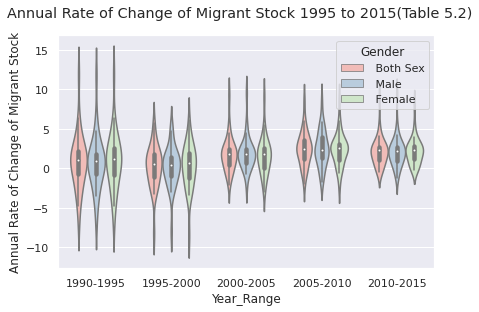

In [49]:
sns.set(style="darkgrid")
# Grouped violinplot
fig5_2 = sns.violinplot(x="Year_Range", y="Annual Rate of Change of Migrant Stock", hue="Gender", data=table5_Region_Conti, palette="Pastel1", width=0.7)
fig5_2.figure.suptitle("Annual Rate of Change of Migrant Stock 1995 to 2015(Table 5.2)")

The small multiple figure below used plotly, it need to be open at Jupyter. 

In [50]:
#Figure 3 shows the trend of migrant stock in both gender and year based on continents
fig5_3 = px.histogram(data_frame = table5_Region_Conti, x = 'Name of Country', y = 'Annual Rate of Change of Migrant Stock', facet_col = 'Year_Range', facet_row= 'Gender')
#fig5_3.set_title("International Migrant Stock of Region or Continents from 1995 to 2015(Table 5.3)")
fig5_3